# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

⚠️ **Note:** This is not financial advice.

Links:

All resources: https://github.com/mrdbourke/tensorflow-deep-learning  
Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Get data
We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-07-29 12:40:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-07-29 12:40:17 (7.37 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoun data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


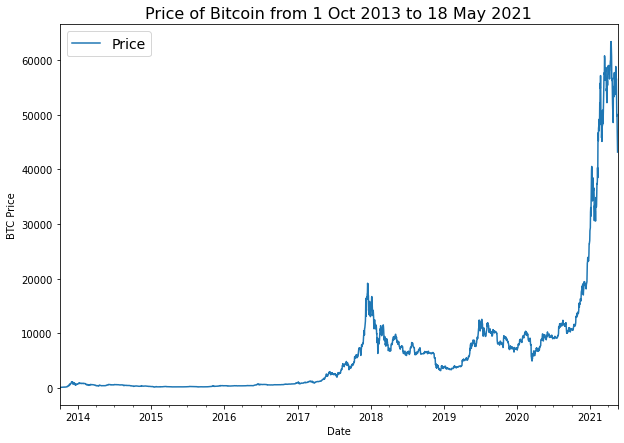

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Import time series data with Python's CSV module

In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get loading price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

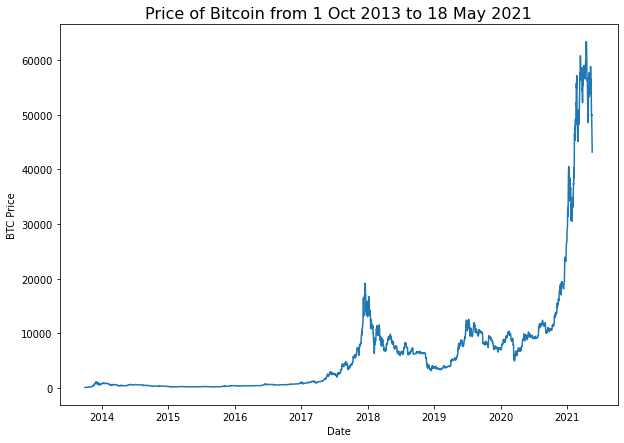

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
#import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")

## Format data part1: Create train and test sets of our time series data

### Createing train and test sets with time series data (the wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # date
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

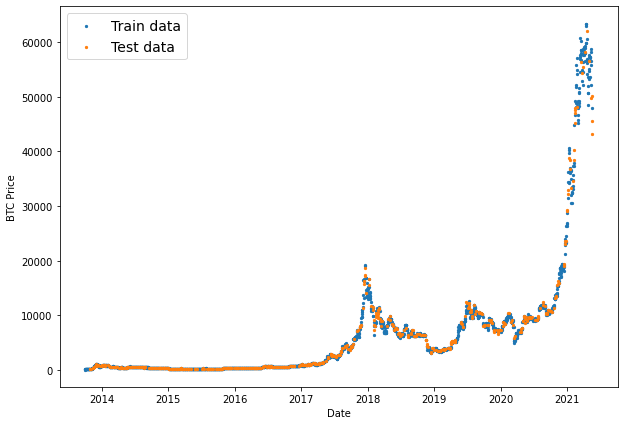

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [13]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

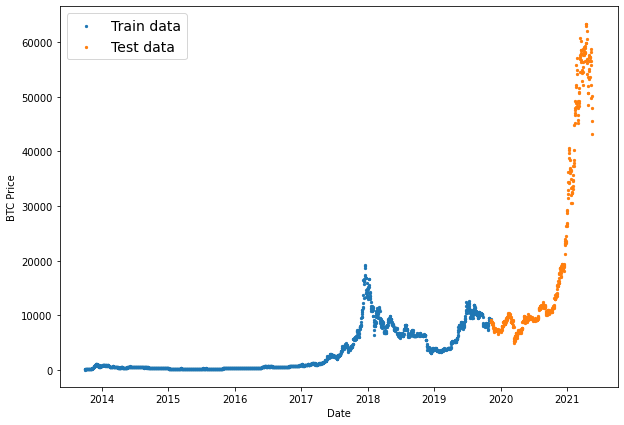

In [14]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

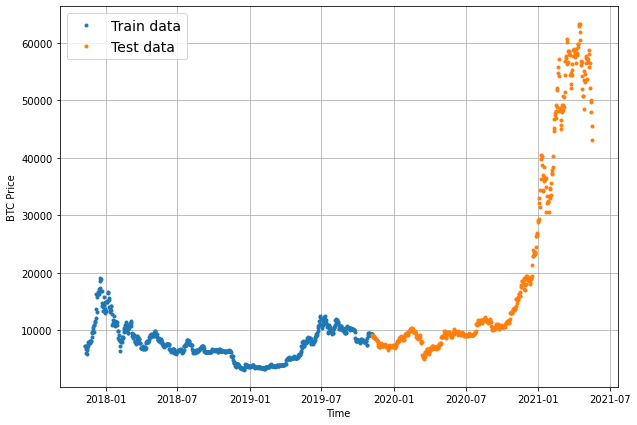

In [16]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, start=1500, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**


Modelling experiments we're running:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [18]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

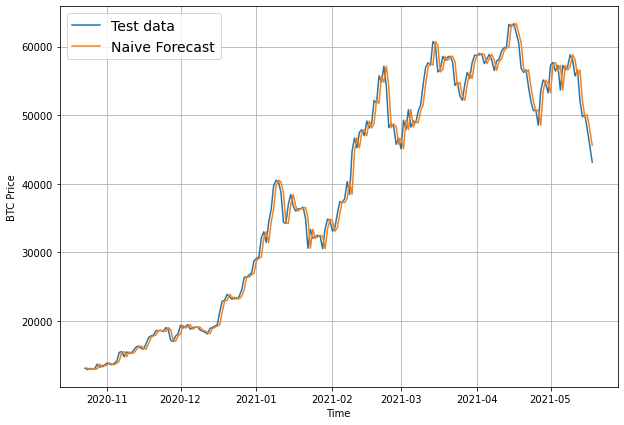

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)**?

> 📖 **Resource:** For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implements MASE ( assuming no seasonaly of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naivee forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [23]:
# Create a function to take in model predicitons and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works...

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [25]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts
In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset
Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.
```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [29]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [31]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[: , -horizon:]

In [32]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite lsow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon


> 📖 **Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [33]:
import numpy as np
# Create a function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps 8minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [34]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


> 🔑 **Note:** There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

## Turning windows into training and test sets

In [37]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
# Make the train/test splits
def make_train_test_splits(windows, labels,test_split=0.2):
  """
  Split matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [39]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [42]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [43]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filenmae
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns on its own

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation 
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"]) 

# 3. Fit the model
history_model_1 = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 7s 107ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 48ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 60ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 85ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 60ms/step - loss: 158.

In [45]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.2500


[585.9757690429688, 585.9757690429688, 1197802.25]

In [46]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecasts with a model (on the test dataset)
To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [47]:
def make_preds(model, input_data):
  """
  Uses model to make predicitons input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) #return 1D array predictions

In [48]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [49]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [50]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

In [51]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

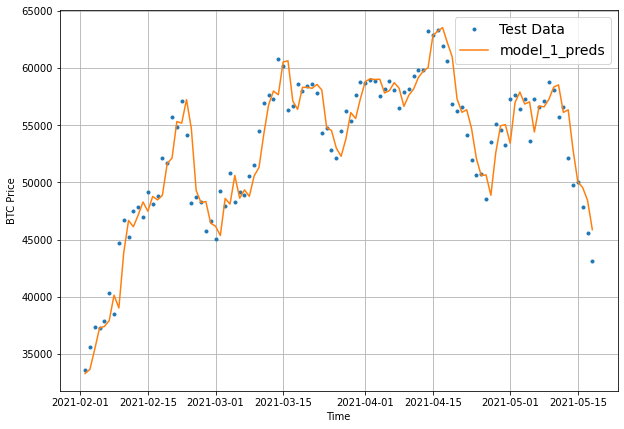

In [52]:
# Let's plot our model 1 predicitons
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_1_preds, 
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [53]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [54]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [55]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [56]:
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [58]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [59]:
# Get forecast predicitons
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [60]:
# Evaluate results for model 2 predicions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [61]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

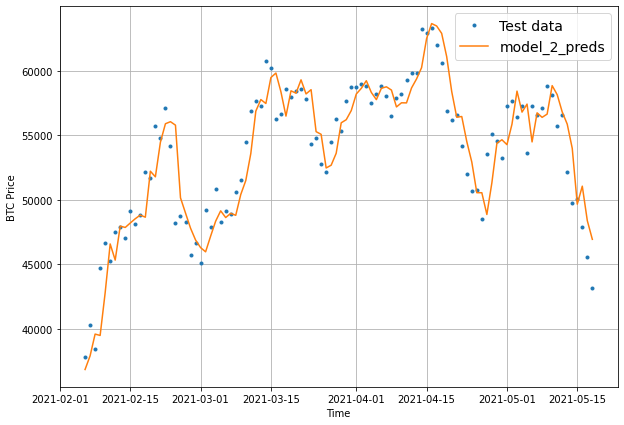

In [62]:
offset = 450
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [63]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [64]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [66]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit
history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              batch_size=128,
                              verbose=0,
                              epochs=100,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [67]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525 - mae: 1300.1525 - mse: 5599956.0000


[1300.1524658203125, 1300.1524658203125, 5599956.0]

In [68]:
# Load best version of model 3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065 - mae: 1237.5065 - mse: 5405199.0000


[1237.5064697265625, 1237.5064697265625, 5405199.0]

In [69]:
# Make predictions with model 3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [70]:
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [71]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [72]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1576  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79548 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98123 ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

## Mkae our evaluation function work for larger horizons

In [73]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065 - mae: 1237.5065 - mse: 5405199.0000


[1237.5064697265625, 1237.5064697265625, 5405199.0]

In [74]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1237.5065

In [75]:
model_2_results["mae"].ndim

0

In [76]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [77]:
# Get model_3 resutls aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5065,
 'mape': 5.558879,
 'mase': 2.2020733,
 'mse': 5405198.5,
 'rmse': 1425.7478}

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize!

In [78]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [79]:
test_labels[:]

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

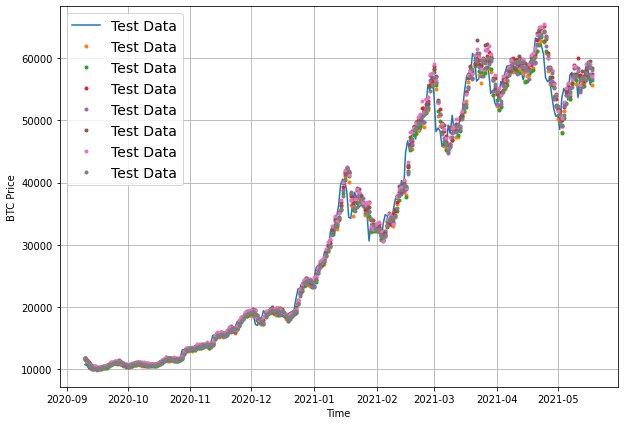

In [80]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="Test Data")

In [81]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
       9357.3545], dtype=float32)>

In [82]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9306.821>

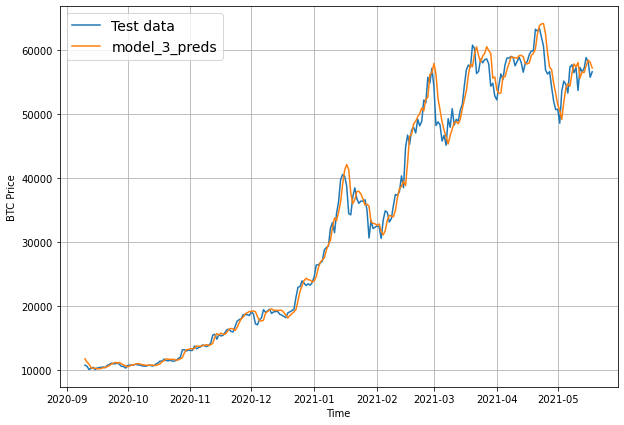

In [83]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

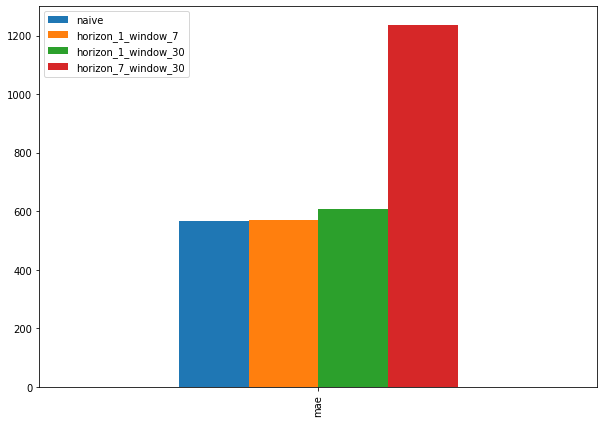

In [84]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

> 🔑 **Note:** You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naïve model will often get fairly good results.

> 📖 **Resource:** For more on how autocorrelation influences a model's predictions, see the article How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik.

## Model 4: Conv1D

In [85]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [86]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [87]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [88]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [89]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [90]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [91]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINSOW_SIZE, )
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = (WINDOW_SIZE, 1)
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [92]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit 
history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 10s 70ms/step - loss: 1207.3817 - mae: 1207.3817 - mse: 5128398.0000 - val_loss: 2320.6218 - val_mae: 2320.6218 - val_mse: 13063541.0000
Epoch 2/100
18/18 [==============================] - 1s 40ms/step - loss: 316.2171 - mae: 316.2171 - mse: 408753.9375 - val_loss: 1467.2799 - val_mae: 1467.2799 - val_mse: 5375009.5000
Epoch 3/100
18/18 [==============================] - 1s 38ms/step - loss: 192.6853 - mae: 192.6853 - mse: 187429.8281 - val_loss: 1164.7074 - val_mae: 1164.7074 - val_mse: 3801948.0000
Epoch 4/100
18/18 [==============================] - 1s 39ms/step - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562 - val_loss: 981.6695 - val_mae: 981.6695 - val_mse: 3154571.5000
Epoch 5/100
18/18 [==============================] - 1s 39ms/step - loss: 172.3467 - mae: 172.3467 - mse: 159527.5469 - val_loss: 960.8708 - val_mae: 960.8708 - val_mse: 3055978.0000
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 

In [93]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Evaluate model 4
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1541 - mae: 610.1541 - mse: 1242910.6250


[610.154052734375, 610.154052734375, 1242910.625]

In [95]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8284 - mae: 570.8284 - mse: 1176671.2500


[570.828369140625, 570.828369140625, 1176671.25]

In [96]:
# Make predictions
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [97]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.82837,
 'mape': 2.5593357,
 'mase': 1.0027874,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [98]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [99]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [100]:
tf.random.set_seed(42)

# Let's build a LSTM model with the Funcitonal API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x =  layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit
history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2581.3218 - mae: 2581.3218 - mse: 16304272.0000 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 131ms/step - loss: 2323.6082 - mae: 2323.6082 - mse: 13451164.0000 - val_loss: 9222.6523 - val_mae: 9222.6523 - val_mse: 150544848.0000
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 947.0196 - mae: 947.0196 - mse: 2470557.7500  INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 695.4739 - mae: 695.4739 - mse: 1664331.0000 - val_loss: 1486.0555 - val_mae: 1486.0555 - val_mse: 6266154.5000
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 280.7843 - mae: 280.7843 - mse: 296868.1875INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 237.3967 - mae: 237.3967 - mse: 238510.3281 - val_loss: 1298.9084 - val_mae: 1298.9084 - val_mse: 4394857.5000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330 - mae: 196.5330 - mse: 197479.2500INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 181.9180 - mae: 181.9180 - mse: 168791.5625 - val_loss: 966.6431 - val_mae: 966.6431 - val_mse: 3159459.2500
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - mae: 173.4022 - mse: 159026.5625 - val_loss: 970.9295 - val_mae: 970.9295 - val_mse: 3095508.5000
Epoch 6/100
 9/18 [==============>...............] - ETA: 0s - loss: 168.0930 - mae: 168.0930 - mse: 132130.0625INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 173.5414 - mae: 173.5414 - mse: 154012.8281 - val_loss: 941.4746 - val_mae: 941.4746 - val_mse: 2827413.2500
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 181.8447 - mae: 181.8447 - mse: 181875.5625INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 170.3566 - mae: 170.3566 - mse: 155902.1719 - val_loss: 898.5215 - val_mae: 898.5215 - val_mse: 2614158.7500
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6712 - mae: 157.6712 - mse: 136152.3125 - val_loss: 914.8642 - val_mae: 914.8642 - val_mse: 2657904.7500
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 166.5143 - mae: 166.5143 - mse: 146057.1719 - val_loss: 1079.0776 - val_mae: 1079.0776 - val_mse: 3372638.7500
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 162.4181 - mae: 162.4181 - mse: 130218.3594INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 162.3369 - mae: 162.3369 - mse: 134529.5469 - val_loss: 877.1690 - val_mae: 877.1690 - val_mse: 2416075.5000
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 163.0841 - mae: 163.0841 - mse: 142166.6875 - val_loss: 924.1126 - val_mae: 924.1127 - val_mse: 2880439.5000
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - mae: 168.5598 - mse: 149940.1094 - val_loss: 941.6025 - val_mae: 941.6025 - val_mse: 2945409.0000
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 166.4726 - mae: 166.4726 - mse: 149715.0000 - val_loss: 934.8436 - val_mae: 934.8436 - val_mse: 2894061.0000
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - mae: 163.9537 - mse: 144073.3438 - val_loss: 920.2160 - val_mae: 920.2160 - val_mse: 2636641.0000
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 151.0251 - mae: 151.0251 -

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 124ms/step - loss: 152.9470 - mae: 152.9470 - mse: 123160.4453 - val_loss: 856.2653 - val_mae: 856.2653 - val_mse: 2465898.5000
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 147.4420 - mae: 147.4420 - mse: 116629.3828 - val_loss: 898.9914 - val_mae: 898.9914 - val_mse: 2276295.7500
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0533 - mae: 151.0533 - mse: 118490.4844 - val_loss: 943.1418 - val_mae: 943.1418 - val_mse: 2741249.7500
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 157.8232 - mae: 157.8232 - mse: 135940.5000 - val_loss: 924.0046 - val_mae: 924.0046 - val_mse: 2666361.0000
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 155.9198 - mae: 155.9198 - mse: 133608.1875 - val_loss: 911.4753 - val_mae: 911.4753 - val_mse: 2607185.5000
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 155.6456 - mae: 155.64

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 146.8467 - mae: 146.8467 - mse: 120590.7266 - val_loss: 845.2782 - val_mae: 845.2782 - val_mse: 2279688.0000
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 148.7083 - mae: 148.7083 - mse: 114816.8516INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 145.9843 - mae: 145.9843 - mse: 118008.3594 - val_loss: 818.6807 - val_mae: 818.6807 - val_mse: 2195707.0000
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 153.2509 - mae: 153.2509 - mse: 131652.0938INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 144.4289 - mae: 144.4289 - mse: 116627.6328 - val_loss: 804.3279 - val_mae: 804.3279 - val_mse: 2141244.2500
Epoch 28/100
10/18 [===============>..............] - ETA: 0s - loss: 148.9089 - mae: 148.9089 - mse: 118942.8281INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 125ms/step - loss: 142.4610 - mae: 142.4610 - mse: 115313.7578 - val_loss: 789.0859 - val_mae: 789.0859 - val_mse: 2095049.6250
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 141.8739 - mae: 141.8739 - mse: 112794.9297 - val_loss: 806.6758 - val_mae: 806.6758 - val_mse: 2090220.2500
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 142.0521 - mae: 142.0521 - mse: 112808.3359 - val_loss: 794.8836 - val_mae: 794.8837 - val_mse: 2040775.6250
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 138.5929 - mae: 138.5929 - mse: 107576.3672INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 138.4690 - mae: 138.4690 - mse: 107980.4766 - val_loss: 773.2812 - val_mae: 773.2812 - val_mse: 1972856.3750
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 137.6196 - mae: 137.6196 - mse: 98855.5234INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 137.1986 - mae: 137.1986 - mse: 106284.4766 - val_loss: 772.2625 - val_mae: 772.2625 - val_mse: 1948036.6250
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9342 - mae: 135.9342 - mse: 103751.0312 - val_loss: 786.4805 - val_mae: 786.4805 - val_mse: 1961976.8750
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 136.1931 - mae: 136.1931 - mse: 104538.6016INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 136.1931 - mae: 136.1931 - mse: 104538.6016 - val_loss: 744.4506 - val_mae: 744.4506 - val_mse: 1886289.3750
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 133.4513 - mae: 133.4513 - mse: 102255.5938 - val_loss: 756.2970 - val_mae: 756.2970 - val_mse: 1852667.6250
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 128.8641 - mae: 128.8641 - mse: 99836.8750 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 125ms/step - loss: 134.0992 - mae: 134.0992 - mse: 103215.3203 - val_loss: 735.1729 - val_mae: 735.1729 - val_mse: 1840291.6250
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - mae: 130.6932 - mse: 99329.6328 - val_loss: 745.9099 - val_mae: 745.9099 - val_mse: 1796193.8750
Epoch 38/100
 9/18 [==============>...............] - ETA: 0s - loss: 136.2749 - mae: 136.2749 - mse: 106828.8984INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 129.2891 - mae: 129.2891 - mse: 96651.1484 - val_loss: 717.2498 - val_mae: 717.2498 - val_mse: 1739678.7500
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6088 - mae: 129.6088 - mse: 97402.8438 - val_loss: 719.0665 - val_mae: 719.0665 - val_mse: 1764965.1250
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6111 - mae: 129.6111 - mse: 96268.3438 - val_loss: 732.0632 - val_mae: 732.0632 - val_mse: 1722418.6250
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 133.4343 - mae: 133.4343 - mse: 101120.7578INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 127.1393 - mae: 127.1393 - mse: 94059.6016 - val_loss: 702.9354 - val_mae: 702.9354 - val_mse: 1654539.1250
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 121.0014 - mae: 121.0014 - mse: 89177.0469INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 124ms/step - loss: 125.6111 - mae: 125.6111 - mse: 93062.1328 - val_loss: 700.8702 - val_mae: 700.8702 - val_mse: 1632477.6250
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 126.0108 - mae: 126.0108 - mse: 91516.9219 - val_loss: 718.7674 - val_mae: 718.7674 - val_mse: 1641069.8750
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6546 - mae: 129.6546 - mse: 91396.2188 - val_loss: 733.8776 - val_mae: 733.8776 - val_mse: 1807974.2500
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 123.4106 - mae: 123.4106 - mse: 83707.7188INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 123.8633 - mae: 123.8633 - mse: 87592.5547 - val_loss: 679.5216 - val_mae: 679.5216 - val_mse: 1567213.8750
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 125.1158 - mae: 125.1158 - mse: 92190.6094 - val_loss: 683.1664 - val_mae: 683.1664 - val_mse: 1574641.7500
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 123.1633 - mae: 123.1633 - mse: 89470.0234 - val_loss: 711.8231 - val_mae: 711.8231 - val_mse: 1617132.7500
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 120.7902 - mae: 120.7902 - mse: 83728.1016INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 122.3360 - mae: 122.3360 - mse: 85994.3750 - val_loss: 672.5154 - val_mae: 672.5154 - val_mse: 1511827.3750
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 125.6529 - mae: 125.6529 - mse: 100223.8516INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 120.4449 - mae: 120.4449 - mse: 85457.0938 - val_loss: 662.7626 - val_mae: 662.7626 - val_mse: 1480526.0000
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 121.4399 - mae: 121.4399 - mse: 85341.3203 - val_loss: 665.7146 - val_mae: 665.7146 - val_mse: 1543955.2500
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 120.6053 - mae: 120.6053 - mse: 82770.2422 - val_loss: 732.0874 - val_mae: 732.0874 - val_mse: 1626788.7500
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 122.5057 - mae: 122.5057 - mse: 86106.6875 - val_loss: 663.2674 - val_mae: 663.2674 - val_mse: 1554532.0000
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 120.5402 - mae: 120.5402 - mse: 85504.0938 - val_loss: 664.9051 - val_mae: 664.9051 - val_mse: 1493745.3750
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1514 - mae: 120.1514 - 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 128ms/step - loss: 119.5086 - mae: 119.5086 - mse: 84537.0703 - val_loss: 653.8528 - val_mae: 653.8528 - val_mse: 1465085.8750
Epoch 56/100
10/18 [===============>..............] - ETA: 0s - loss: 124.7942 - mae: 124.7942 - mse: 99148.1094 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 121.1292 - mae: 121.1292 - mse: 86233.9531 - val_loss: 649.8549 - val_mae: 649.8549 - val_mse: 1454400.8750
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 124.7412 - mae: 124.7412 - mse: 87936.6250 - val_loss: 691.6100 - val_mae: 691.6100 - val_mse: 1531474.0000
Epoch 58/100
10/18 [===============>..............] - ETA: 0s - loss: 120.5240 - mae: 120.5240 - mse: 90332.4766INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 119.2250 - mae: 119.2250 - mse: 84113.7812 - val_loss: 645.0276 - val_mae: 645.0276 - val_mse: 1432131.8750
Epoch 59/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.1836 - mae: 113.1836 - mse: 85045.9141INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 118.4404 - mae: 118.4404 - mse: 83200.6719 - val_loss: 644.6122 - val_mae: 644.6122 - val_mse: 1444655.3750
Epoch 60/100
10/18 [===============>..............] - ETA: 0s - loss: 119.6892 - mae: 119.6892 - mse: 84599.2656INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 127ms/step - loss: 118.0380 - mae: 118.0380 - mse: 81562.1328 - val_loss: 642.0088 - val_mae: 642.0088 - val_mse: 1414782.5000
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 117.5400 - mae: 117.5400 - mse: 82932.9922 - val_loss: 669.7113 - val_mae: 669.7113 - val_mse: 1467180.2500
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 119.7727 - mae: 119.7727 - mse: 80750.5938 - val_loss: 697.4139 - val_mae: 697.4139 - val_mse: 1614670.0000
Epoch 63/100
10/18 [===============>..............] - ETA: 0s - loss: 132.8258 - mae: 132.8258 - mse: 105121.3594INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 121.1834 - mae: 121.1834 - mse: 84976.5703 - val_loss: 634.7335 - val_mae: 634.7335 - val_mse: 1390432.7500
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4595 - mae: 115.4595 - mse: 80885.6484 - val_loss: 675.0085 - val_mae: 675.0085 - val_mse: 1473569.0000
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 119.2191 - mae: 119.2191 - mse: 86762.5156 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 118.1558 - mae: 118.1558 - mse: 83331.7109 - val_loss: 629.1392 - val_mae: 629.1392 - val_mse: 1381197.6250
Epoch 66/100
10/18 [===============>..............] - ETA: 0s - loss: 112.9959 - mae: 112.9959 - mse: 65313.4453INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 115.4529 - mae: 115.4529 - mse: 80344.5234 - val_loss: 627.9604 - val_mae: 627.9604 - val_mse: 1368327.0000
Epoch 67/100
10/18 [===============>..............] - ETA: 0s - loss: 110.8976 - mae: 110.8976 - mse: 64161.7930INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 126ms/step - loss: 116.2066 - mae: 116.2066 - mse: 81138.6875 - val_loss: 625.6245 - val_mae: 625.6245 - val_mse: 1370185.0000
Epoch 68/100
11/18 [=================>............] - ETA: 0s - loss: 114.4769 - mae: 114.4769 - mse: 74250.6953INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 116.6187 - mae: 116.6187 - mse: 81189.1484 - val_loss: 623.4525 - val_mae: 623.4525 - val_mse: 1361003.0000
Epoch 69/100
11/18 [=================>............] - ETA: 0s - loss: 120.8723 - mae: 120.8723 - mse: 82826.7734INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 118.0624 - mae: 118.0624 - mse: 81545.6250 - val_loss: 622.1856 - val_mae: 622.1856 - val_mse: 1358866.3750
Epoch 70/100
11/18 [=================>............] - ETA: 0s - loss: 114.0267 - mae: 114.0267 - mse: 80509.7812 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 115.7337 - mae: 115.7337 - mse: 80195.6094 - val_loss: 621.4358 - val_mae: 621.4358 - val_mse: 1357481.5000
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7824 - mae: 114.7824 - mse: 79604.9297 - val_loss: 641.8514 - val_mae: 641.8514 - val_mse: 1382887.8750
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 117.9559 - mae: 117.9559 - mse: 80682.0703 - val_loss: 626.1079 - val_mae: 626.1079 - val_mse: 1374440.8750
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9118 - mae: 114.9118 - mse: 79732.7812 - val_loss: 626.1880 - val_mae: 626.1880 - val_mse: 1374299.7500
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8266 - mae: 114.8266 - mse: 79835.1719 - val_loss: 622.5093 - val_mae: 622.5093 - val_mse: 1338788.8750
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3035 - mae: 115.3035 - 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 125ms/step - loss: 114.6212 - mae: 114.6212 - mse: 78590.6172 - val_loss: 609.3450 - val_mae: 609.3450 - val_mse: 1310549.5000
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8826 - mae: 112.8826 - mse: 77727.6953 - val_loss: 623.5228 - val_mae: 623.5228 - val_mse: 1331557.2500
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1873 - mae: 113.1873 - mse: 77236.4688 - val_loss: 633.7752 - val_mae: 633.7752 - val_mse: 1351109.6250
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 122.9916 - mae: 122.9916 - mse: 94368.7344 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 115.9149 - mae: 115.9149 - mse: 80479.8906 - val_loss: 606.1874 - val_mae: 606.1874 - val_mse: 1304145.2500
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4628 - mae: 113.4628 - mse: 77553.0938 - val_loss: 627.0270 - val_mae: 627.0270 - val_mse: 1367428.6250
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5080 - mae: 114.5080 - mse: 77369.4062 - val_loss: 625.7433 - val_mae: 625.7433 - val_mse: 1330637.6250
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 114.8582 - mae: 114.8582 - mse: 77734.1484 - val_loss: 636.0798 - val_mae: 636.0798 - val_mse: 1351679.2500
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6118 - mae: 115.6118 - mse: 79313.3047 - val_loss: 611.4059 - val_mae: 611.4059 - val_mse: 1301911.5000
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 117.3634 - mae: 117.3634 - mse:

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 112.8969 - mae: 112.8969 - mse: 77412.3047 - val_loss: 603.1694 - val_mae: 603.1694 - val_mse: 1295346.6250
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 114.5271 - mae: 114.5271 - mse: 85009.3047 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 111.4757 - mae: 111.4757 - mse: 76875.1641 - val_loss: 601.3164 - val_mae: 601.3164 - val_mse: 1285404.3750
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3921 - mae: 111.3921 - mse: 76081.2500 - val_loss: 626.0508 - val_mae: 626.0508 - val_mse: 1325468.1250
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 115.8496 - mae: 115.8496 - mse: 80458.5156 - val_loss: 660.8721 - val_mae: 660.8721 - val_mse: 1399698.7500
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.3432 - mae: 116.3432 - mse: 80152.7734 - val_loss: 636.2885 - val_mae: 636.2885 - val_mse: 1381807.5000
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 113.2050 - mae: 113.2050 - mse: 78131.5312 - val_loss: 610.3386 - val_mae: 610.3386 - val_mse: 1292934.1250
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 113.8648 - mae: 113.8648 - mse:

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 112.5368 - mae: 112.5368 - mse: 78119.5234 - val_loss: 597.9772 - val_mae: 597.9772 - val_mse: 1278178.2500
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0817 - mae: 111.0817 - mse: 76193.6094 - val_loss: 605.4083 - val_mae: 605.4083 - val_mse: 1299836.2500
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 108.2932 - mae: 108.2932 - mse: 72275.5781 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 110.9924 - mae: 110.9924 - mse: 76137.4062 - val_loss: 595.8463 - val_mae: 595.8463 - val_mse: 1271306.0000
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3879 - mae: 112.3879 - mse: 76676.0859 - val_loss: 605.8414 - val_mae: 605.8414 - val_mse: 1281021.0000
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2432 - mae: 111.2432 - mse: 74837.0234 - val_loss: 610.7874 - val_mae: 610.7874 - val_mse: 1311682.8750
Epoch 98/100
11/18 [=================>............] - ETA: 0s - loss: 112.4050 - mae: 112.4050 - mse: 77099.1250INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 111.4042 - mae: 111.4042 - mse: 75838.1016 - val_loss: 594.7564 - val_mae: 594.7564 - val_mse: 1267878.5000
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8394 - mae: 110.8394 - mse: 76082.6484 - val_loss: 595.3280 - val_mae: 595.3280 - val_mse: 1269334.7500
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4442 - mae: 114.4442 - mse: 76671.7734 - val_loss: 600.9989 - val_mae: 600.9989 - val_mse: 1285055.7500


In [101]:
# Load in the best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 594.7563 - mae: 594.7563 - mse: 1267878.5000


[594.75634765625, 594.75634765625, 1267878.5]

In [102]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.832, 8811.05 , 8997.982, 8837.677, 8731.77 ], dtype=float32)>

In [103]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.7564,
 'mape': 2.6723645,
 'mase': 1.0448223,
 'mse': 1267878.5,
 'rmse': 1126.0011}

> 🔑 **Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset
Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0
What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [104]:
# Let's make a multivariant time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 20123)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [106]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [107]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_rewerd values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [108]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [109]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


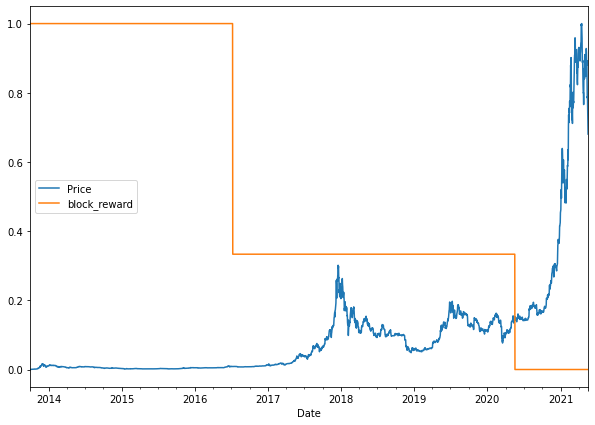

In [110]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas
Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [111]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [112]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [113]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [114]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [115]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [116]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit
history_model_6 = model_6.fit(X_train,
                              y_train,
                              epochs=100,
                              batch_size=128,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2853.4023 - mae: 2853.4023 - mse: 16863842.0000INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 1234.6804 - mae: 1234.6804 - mse: 5282005.5000 - val_loss: 2061.9077 - val_mae: 2061.9077 - val_mse: 11377605.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 354.1011 - mae: 354.1011 - mse: 507302.7500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 351.5053 - mae: 351.5053 - mse: 499358.0312 - val_loss: 1908.6733 - val_mae: 1908.6733 - val_mse: 8719443.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 235.4153 - mae: 235.4153 - mse: 276006.8125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.8125 - val_loss: 1329.0585 - val_mae: 1329.0585 - val_mse: 4991872.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0341 - mae: 271.0341 - mse: 308825.3125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.7188 - val_loss: 1102.1342 - val_mae: 1102.1342 - val_mse: 3934655.5000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - mae: 196.5770 - mse: 204309.3750 - val_loss: 1107.8474 - val_mae: 1107.8474 - val_mse: 3822059.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3367 - mae: 145.3367 - mse: 79556.4219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 187.2245 - mae: 187.2245 - mse: 185754.2344 - val_loss: 1036.1720 - val_mae: 1036.1720 - val_mse: 3602705.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.5105 - mae: 231.5105 - mse: 367153.1562INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 182.0245 - mae: 182.0245 - mse: 177482.7188 - val_loss: 1019.2928 - val_mae: 1019.2928 - val_mse: 3334209.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5176 - mae: 151.5176 - mse: 94419.4844INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 175.7059 - mae: 175.7059 - mse: 166085.1875 - val_loss: 977.8488 - val_mae: 977.8488 - val_mse: 3114359.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1689 - mae: 142.1689 - mse: 92251.8516INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 170.1784 - mae: 170.1784 - mse: 157931.9844 - val_loss: 954.4037 - val_mae: 954.4037 - val_mse: 2930253.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 177.8448 - mae: 177.8448 - mse: 219206.6250INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 164.4430 - mae: 164.4430 - mse: 149624.9688 - val_loss: 913.5148 - val_mae: 913.5148 - val_mse: 2725004.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3627 - mae: 171.3627 - mse: 133984.9375INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 158.6892 - mae: 158.6892 - mse: 137497.7188 - val_loss: 874.2507 - val_mae: 874.2507 - val_mse: 2503844.0000
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0429 - mae: 147.0429 - mse: 97438.9219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 152.0732 - mae: 152.0732 - mse: 128314.8047 - val_loss: 861.0418 - val_mae: 861.0418 - val_mse: 2380361.5000
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 151.1057 - mae: 151.1057 - mse: 126204.8906 - val_loss: 886.1207 - val_mae: 886.1207 - val_mse: 2378220.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2400 - mae: 152.2400 - mse: 107309.0312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 147.5482 - mae: 147.5482 - mse: 118020.3594 - val_loss: 837.8616 - val_mae: 837.8616 - val_mse: 2199054.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6370 - mae: 146.6370 - mse: 79022.5391INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 142.3497 - mae: 142.3497 - mse: 113288.9844 - val_loss: 794.4788 - val_mae: 794.4788 - val_mse: 2039430.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8471 - mae: 125.8471 - mse: 68738.1406INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 137.5206 - mae: 137.5206 - mse: 106858.8672 - val_loss: 778.4052 - val_mae: 778.4052 - val_mse: 1954907.1250
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1490 - mae: 125.1490 - mse: 75813.5234INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 135.8190 - mae: 135.8190 - mse: 104154.0156 - val_loss: 772.4532 - val_mae: 772.4532 - val_mse: 1901520.8750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.6097 - mae: 145.6097 - mse: 99865.8984INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 134.8562 - mae: 134.8562 - mse: 102955.3984 - val_loss: 747.4802 - val_mae: 747.4802 - val_mse: 1804914.0000
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.3347 - mae: 130.3347 - mse: 96741.8359 - val_loss: 761.0554 - val_mae: 761.0554 - val_mse: 1809536.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2515 - mae: 145.2515 - mse: 111915.8125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 128.6775 - mae: 128.6775 - mse: 93855.7109 - val_loss: 701.8977 - val_mae: 701.8977 - val_mse: 1664374.8750
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 128.7350 - mae: 128.7350 - mse: 91536.7969 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 129.5576 - mae: 129.5576 - mse: 95792.1094 - val_loss: 691.0128 - val_mae: 691.0128 - val_mse: 1604253.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6308 - mae: 176.6308 - mse: 179691.2812INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 125.8060 - mae: 125.8060 - mse: 90966.0625 - val_loss: 684.4119 - val_mae: 684.4119 - val_mse: 1561598.2500
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5263 - mae: 125.5263 - mse: 90267.1250 - val_loss: 692.1298 - val_mae: 692.1298 - val_mse: 1560176.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1221 - mae: 134.1221 - mse: 83312.5703INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 122.4765 - mae: 122.4765 - mse: 86726.8125 - val_loss: 674.2216 - val_mae: 674.2216 - val_mse: 1504522.2500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.5674 - mae: 133.5674 - mse: 74889.4844INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 121.1171 - mae: 121.1171 - mse: 84265.1875 - val_loss: 669.6441 - val_mae: 669.6441 - val_mse: 1546640.7500
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2623 - mae: 127.2623 - mse: 87325.4219 - val_loss: 690.0403 - val_mae: 690.0403 - val_mse: 1606595.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3230 - mae: 180.3230 - mse: 150015.3438INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 124.6204 - mae: 124.6204 - mse: 87496.1406 - val_loss: 643.9724 - val_mae: 643.9724 - val_mse: 1437325.8750
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2544 - mae: 118.2544 - mse: 81311.5938 - val_loss: 656.2767 - val_mae: 656.2767 - val_mse: 1431099.6250
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8149 - mae: 109.8149 - mse: 76774.9375INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 119.6374 - mae: 119.6374 - mse: 82266.8438 - val_loss: 633.4547 - val_mae: 633.4547 - val_mse: 1375091.7500
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2605 - mae: 130.2605 - mse: 91511.7500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 119.5001 - mae: 119.5001 - mse: 81478.4141 - val_loss: 625.3953 - val_mae: 625.3953 - val_mse: 1360549.6250
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5633 - mae: 114.5633 - mse: 78351.5078 - val_loss: 668.5064 - val_mae: 668.5064 - val_mse: 1448343.6250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3793 - mae: 121.3793 - mse: 82826.2656INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 116.9750 - mae: 116.9750 - mse: 80914.8359 - val_loss: 617.1061 - val_mae: 617.1061 - val_mse: 1328561.7500
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2438 - mae: 115.2438 - mse: 78368.7969 - val_loss: 649.0989 - val_mae: 649.0989 - val_mse: 1390663.2500
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5187 - mae: 114.5187 - mse: 78831.3516 - val_loss: 632.1375 - val_mae: 632.1375 - val_mse: 1383321.0000
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 113.6357 - mae: 113.6357 - mse: 76610.7734INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 113.6357 - mae: 113.6357 - mse: 76610.7734 - val_loss: 607.4173 - val_mae: 607.4173 - val_mse: 1299839.2500
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2605 - mae: 115.2605 - mse: 77254.8047 - val_loss: 626.4319 - val_mae: 626.4319 - val_mse: 1328738.0000
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 113.7020 - mae: 113.7020 - mse: 76909.3125 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 113.7020 - mae: 113.7020 - mse: 76909.3125 - val_loss: 606.2318 - val_mae: 606.2318 - val_mse: 1299941.2500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1735 - mae: 107.1735 - mse: 71145.6016INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 111.4061 - mae: 111.4061 - mse: 75382.8672 - val_loss: 603.2919 - val_mae: 603.2919 - val_mse: 1290358.8750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4214 - mae: 127.4214 - mse: 104832.3750INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 112.7722 - mae: 112.7722 - mse: 75144.9219 - val_loss: 596.0060 - val_mae: 596.0060 - val_mse: 1267989.0000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2578 - mae: 100.2578 - mse: 92350.1250INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 110.5418 - mae: 110.5418 - mse: 73266.8750 - val_loss: 593.2170 - val_mae: 593.2170 - val_mse: 1259325.6250
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8671 - mae: 110.8671 - mse: 73493.2266 - val_loss: 609.1062 - val_mae: 609.1062 - val_mse: 1298276.8750
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7249 - mae: 115.7249 - mse: 78316.4062 - val_loss: 607.4877 - val_mae: 607.4877 - val_mse: 1271583.1250
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3313 - mae: 111.3313 - mse: 72553.7578 - val_loss: 606.2029 - val_mae: 606.2029 - val_mse: 1287464.5000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.3244 - mae: 65.3244 - mse: 16110.7803INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 109.7027 - mae: 109.7027 - mse: 72483.3438 - val_loss: 586.1215 - val_mae: 586.1215 - val_mse: 1236946.1250
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8748 - mae: 107.8748 - mse: 72189.4844 - val_loss: 593.8445 - val_mae: 593.8445 - val_mse: 1256011.2500
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8641 - mae: 109.8641 - mse: 72053.2969 - val_loss: 586.4581 - val_mae: 586.4581 - val_mse: 1224364.6250
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3587 - mae: 112.3587 - mse: 74881.6719 - val_loss: 655.4489 - val_mae: 655.4489 - val_mse: 1368206.2500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1614 - mae: 109.1614 - mse: 72981.2266 - val_loss: 598.7234 - val_mae: 598.7234 - val_mse: 1244141.6250
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3029 - mae: 109.3029 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 110.4068 - mae: 110.4068 - mse: 73627.0078 - val_loss: 575.7752 - val_mae: 575.7752 - val_mse: 1197731.0000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - mae: 108.6609 - mse: 71261.1172 - val_loss: 785.9749 - val_mae: 785.9749 - val_mse: 1798977.1250
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9823 - mae: 124.9823 - mse: 82843.3438 - val_loss: 670.3782 - val_mae: 670.3782 - val_mse: 1435153.7500
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8591 - mae: 112.8591 - mse: 71915.3750 - val_loss: 580.2877 - val_mae: 580.2877 - val_mse: 1201588.0000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2513 - mae: 107.2513 - mse: 70587.5000 - val_loss: 597.5082 - val_mae: 597.5082 - val_mse: 1251075.6250
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2322 - mae: 109.2322 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 112.0475 - mae: 112.0475 - mse: 73420.1875 - val_loss: 575.5540 - val_mae: 575.5540 - val_mse: 1191943.0000
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2830 - mae: 111.2830 - mse: 71301.0156 - val_loss: 590.7802 - val_mae: 590.7802 - val_mse: 1225397.0000
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7918 - mae: 106.7918 - mse: 69382.4531 - val_loss: 586.8840 - val_mae: 586.8840 - val_mse: 1218027.7500
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2987 - mae: 112.2987 - mse: 70631.5625 - val_loss: 696.5287 - val_mae: 696.5287 - val_mse: 1492195.5000
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7808 - mae: 124.7808 - mse: 81109.6016 - val_loss: 698.5261 - val_mae: 698.5261 - val_mse: 1498611.2500
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3443 - mae: 119.3443 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 106.7711 - mae: 106.7711 - mse: 70055.2266 - val_loss: 573.6142 - val_mae: 573.6142 - val_mse: 1185168.7500
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2485 - mae: 110.2485 - mse: 71589.1328 - val_loss: 618.8947 - val_mae: 618.8947 - val_mse: 1289601.2500
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5330 - mae: 105.5330 - mse: 69883.2891 - val_loss: 574.9452 - val_mae: 574.9452 - val_mse: 1189282.1250
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3177 - mae: 107.3177 - mse: 69894.7344 - val_loss: 606.1979 - val_mae: 606.1979 - val_mse: 1240848.5000
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8084 - mae: 107.8084 - mse: 70983.0625 - val_loss: 582.2403 - val_mae: 582.2403 - val_mse: 1206271.7500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.6437 - mae: 83.6437 - mse: 62

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 107.2528 - mae: 107.2528 - mse: 69628.3203 - val_loss: 571.8563 - val_mae: 571.8563 - val_mse: 1180512.1250
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2309 - mae: 106.2309 - mse: 69008.9922 - val_loss: 572.2830 - val_mae: 572.2830 - val_mse: 1174658.7500
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8568 - mae: 105.8568 - mse: 70072.8047 - val_loss: 596.5461 - val_mae: 596.5461 - val_mse: 1236695.8750
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8418 - mae: 107.8418 - mse: 70822.2656 - val_loss: 577.2400 - val_mae: 577.2400 - val_mse: 1181263.0000
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620 - mae: 95.0620 - mse: 44754.0117INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 47ms/step - loss: 105.1101 - mae: 105.1101 - mse: 68809.2188 - val_loss: 568.4897 - val_mae: 568.4897 - val_mse: 1169003.5000
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1867 - mae: 114.1867 - mse: 75576.8047 - val_loss: 592.5609 - val_mae: 592.5609 - val_mse: 1228614.6250
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9631 - mae: 107.9631 - mse: 70494.2969 - val_loss: 651.6213 - val_mae: 651.6213 - val_mse: 1362898.3750
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6690 - mae: 109.6690 - mse: 71213.1641 - val_loss: 568.9340 - val_mae: 568.9340 - val_mse: 1170230.7500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8219 - mae: 105.8219 - mse: 69465.5859 - val_loss: 571.5334 - val_mae: 571.5334 - val_mse: 1169862.0000
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 104.8628 - mae: 104.8628 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 107.7017 - mae: 107.7017 - mse: 69536.8750 - val_loss: 567.8899 - val_mae: 567.8899 - val_mse: 1164816.6250
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9951 - mae: 107.9951 - mse: 68321.1641 - val_loss: 626.7441 - val_mae: 626.7441 - val_mse: 1282530.1250


In [117]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440 - mae: 626.7440 - mse: 1282530.1250


[626.7440185546875, 626.7440185546875, 1282530.125]

In [118]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899 - mae: 567.8899 - mse: 1164816.5000


[567.889892578125, 567.889892578125, 1164816.5]

In [119]:
# Make predicitons with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [120]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mape': 2.5460758,
 'mase': 0.99762523,
 'mse': 1164816.4,
 'rmse': 1079.2666}

In [121]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

In [122]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

For a challenge on different ways to potentially improve the multivariate time series model, see the reference here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#model-6-dense-multivariate-time-series

## Model 7: N-BEATS algorithm
Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer
Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [123]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 5 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Ouput of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do so we'll make some dummy inputs and outputs.

In [124]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [125]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)  # input shape has to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [126]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-BEATS algorithm using `tf.data`
To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [127]:
HORIZON = 1
WINDOW_SIZE = 7

In [128]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [129]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"]  =bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [130]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [131]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm
The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [132]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections
Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [133]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [134]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 792: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1042: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1142: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 20s, sys: 5.78 s, total: 3min 26s
Wall time: 3min 50s


In [135]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 31ms/step - loss: 570.1627


570.1627197265625

In [136]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.38 , 8781.538, 9036.797, 8762.422, 8759.452, 8744.918,
       8667.572, 8500.234, 8478.025, 8517.766], dtype=float32)>

In [137]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 570.1627,
 'mape': 2.5783033,
 'mase': 1.001618,
 'mse': 1165272.4,
 'rmse': 1079.4778}

In [138]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

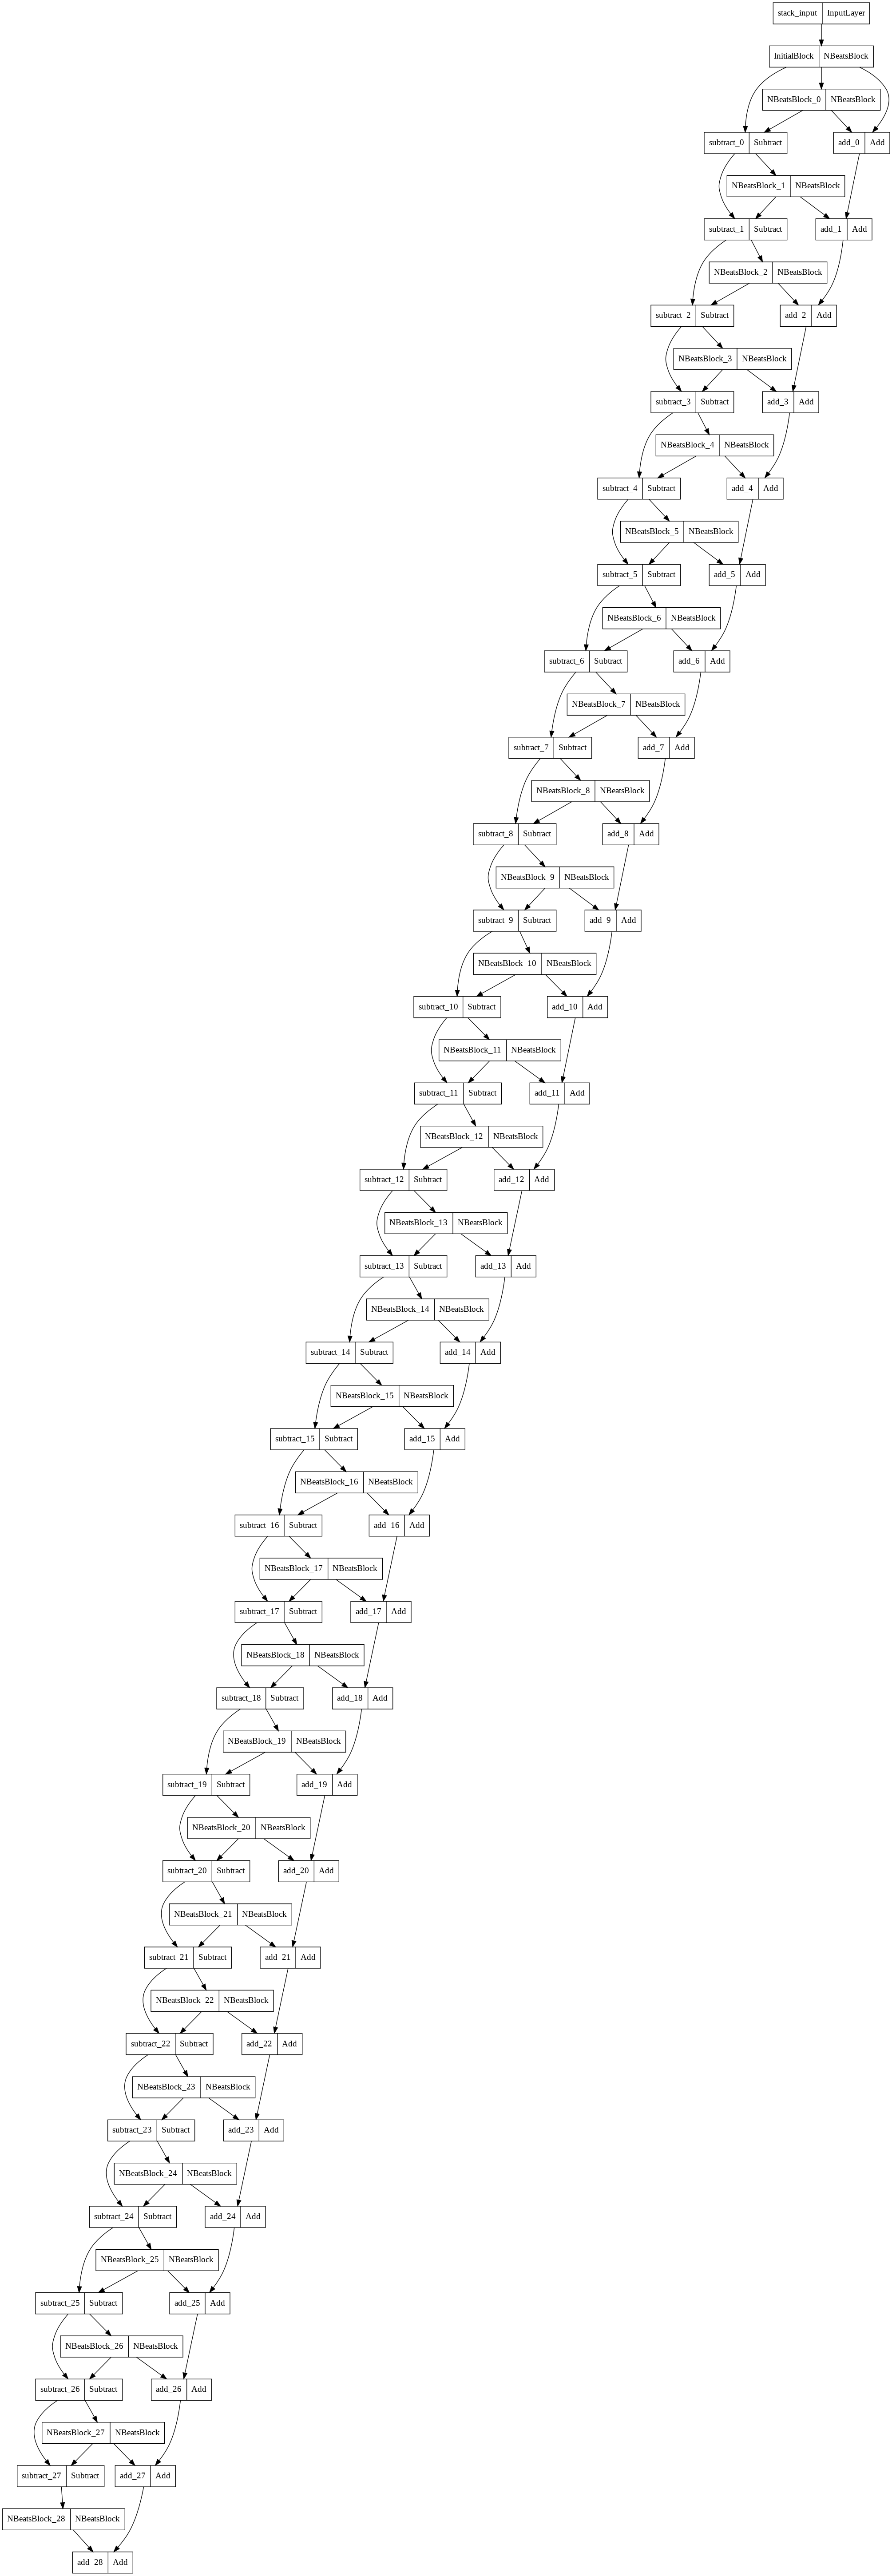

In [139]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [140]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [141]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"])
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss funciton
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simpole model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [142]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 942: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 589: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 704: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 804: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 911: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 509: ReduceLROnPl

### Make predictions with our ensemble model

In [143]:
ensemble_models

In [144]:
# Create a function which uses a list of trained models to make and return a list of predicitons
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [145]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 667 ms, sys: 15.8 ms, total: 683 ms
Wall time: 662 ms


In [146]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8798.41 ,  8771.148,  9048.546, ..., 50194.457, 49275.324,
        46695.258],
       [ 8760.479,  8736.448,  9049.007, ..., 49306.56 , 48516.535,
        45310.7  ],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8970.114,  8805.717,  9076.254, ..., 49684.527, 49932.766,
        46699.234],
       [ 8727.619,  8803.147,  9102.287, ..., 49582.293, 48529.566,
        45036.723],
       [ 8815.881,  8760.732,  9040.146, ..., 49717.688, 48045.24 ,
        45825.656]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [147]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8797.381, 8782.075, 9067.037, 8738.739, 8748.855, 8715.587,
       8672.356, 8483.765, 8460.386, 8531.566], dtype=float32)>

In [148]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8798.41 , 8780.677, 9062.953, 8717.778, 8750.333, 8720.762,
       8672.978, 8478.887, 8457.737, 8532.14 ], dtype=float32)

In [149]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 566.3029,
 'mape': 2.5788248,
 'mase': 0.9948374,
 'mse': 1144708.9,
 'rmse': 1069.9106}

In [150]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 566.6227,
 'mape': 2.5832555,
 'mase': 0.9953991,
 'mse': 1142081.6,
 'rmse': 1068.6823}

In [151]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble
So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)
* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [165]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [162]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

> 📖 **Resource:** Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on Prediction Intervals for Deep Learning Neural Networks

In [163]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

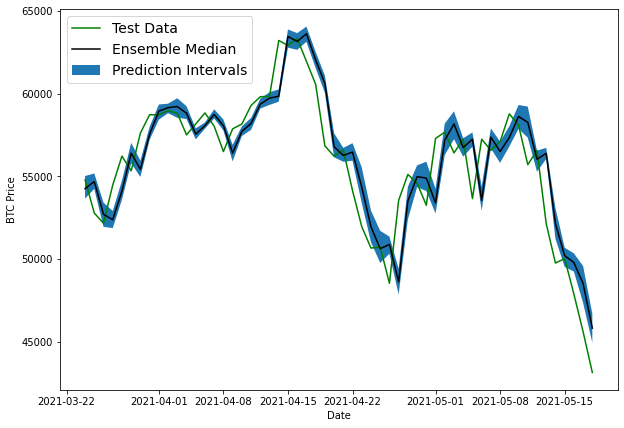

In [164]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)
There are two major types of uncertainty in machine learning you should know about:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

We've only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future
So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [166]:
HORIZON = 1
WINDOW_SIZE = 7

In [167]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [168]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [169]:
# Train model on entire data to make predicitons for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [170]:
X_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [172]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [174]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model on all of the data to make future forecasts
history_model_9 = model_9.fit(dataset_all,
                              epochs=100,
                              verbose=0)

### Make predictions into future

In [175]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input value.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [178]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [181]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.
  Return future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window the nappend it again, again, again (our model will eventually start to amke forecasts on its own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast 

In [182]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875] -> Prediction: 47880.6328125

Predicting on:
 [45604.61575361 43144.47129086 55764.47265625 50985.9296875
 48522.9609375  48137.19921875 47880.6328125 ] -> Prediction: 46879.71484375

Predicting on:
 [43144.47129086 55764.47265625 50985.9296875  48522.960937

### Plot future forecasts

In [183]:
future_forecast

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

In [187]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D")# specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [188]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [189]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [191]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps,0 , last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

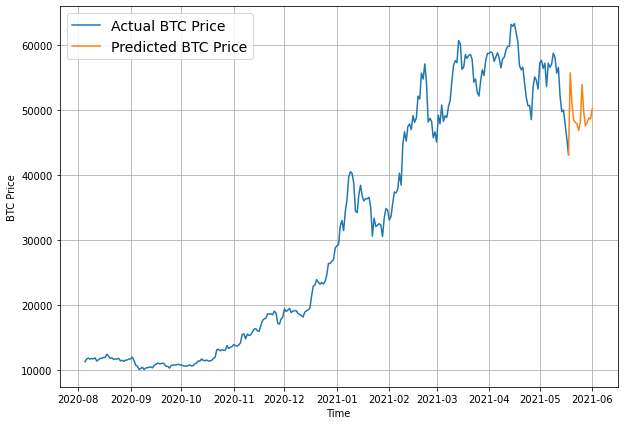

In [192]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [195]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [196]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [197]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [198]:
# GEt the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

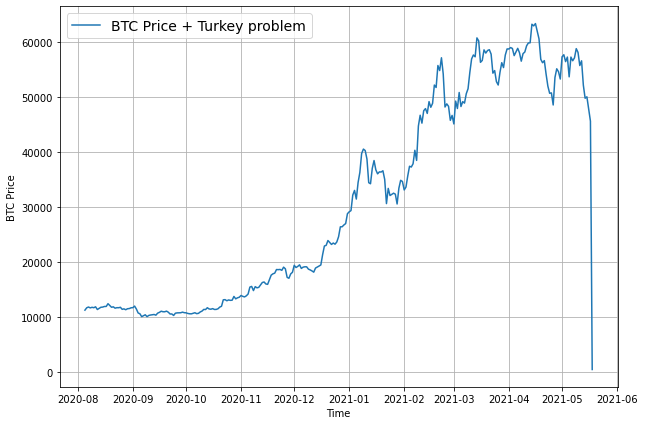

In [199]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [200]:
HORIZON = 1
WINDOW_SIZE = 7

In [204]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [202]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [205]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [206]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 784.3421


784.3421020507812

In [207]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.2444


639.244384765625

In [208]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.551 , 8771.771 , 9017.46  , 8766.701 , 8742.931 , 8721.777 ,
       8657.3545, 8528.889 , 8441.099 , 8516.809 ], dtype=float32)>

In [209]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17120.297,
 'mape': 121.23575,
 'mase': 26.493715,
 'mse': 613761700.0,
 'rmse': 23696.547}

In [210]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

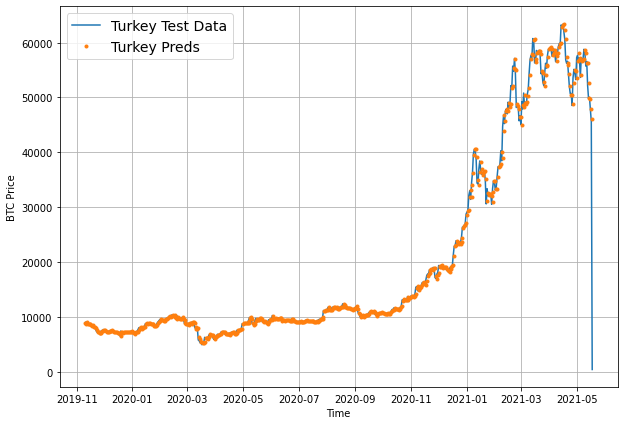

In [211]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare models

In [212]:
ensemble_results

{'mae': 566.6227,
 'mape': 2.5832555,
 'mase': 0.9953991,
 'mse': 1142081.6,
 'rmse': 1068.6823}

In [213]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471069,2.544898,0.999489
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.506470,5.405198e+06,1425.747803,5.558879,2.202073
model_4_CONV1D,570.828369,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,594.756409,1.267878e+06,1126.001099,2.672364,1.044822
model_6_multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
model_7_NBEATS,570.162720,1.165272e+06,1079.477783,2.578303,1.001618
model_8_ensemble,566.622681,1.142082e+06,1068.682251,2.583256,0.995399
model_10_turkey,17120.296875,6.137617e+08,23696.546875,121.235748,26.493715


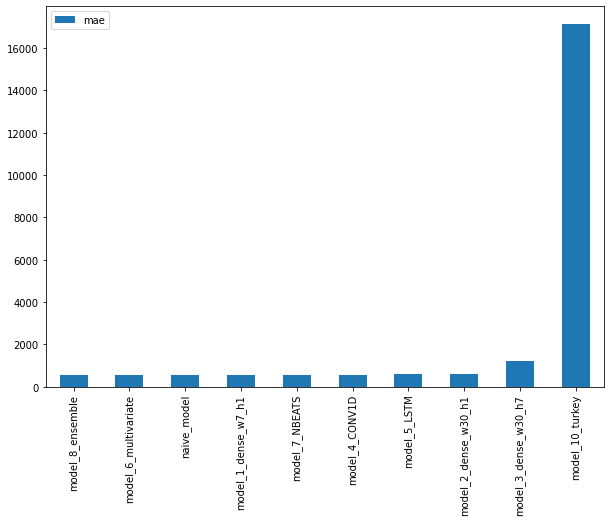

In [214]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");